In [1]:
# Include this line to make plots interactive
%matplotlib inline

# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File Paths
CityFilePath = "data/city_data.csv"
RideFilePath = "data/ride_data.csv"


# Read the City and Ride Data
# Read data into Data Frames
DF_City = pd.read_csv(CityFilePath)
DF_Ride = pd.read_csv(RideFilePath)

# Combine the data into a single dataset
DF_Combined = pd.merge(DF_City , DF_Ride , on = "city") 

DF_Combined.dtypes
# DF_Combined["fare"] = pd.to_numeric(DF_Combined["fare"] )

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [2]:
# Display the data table for preview
DF_Combined.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

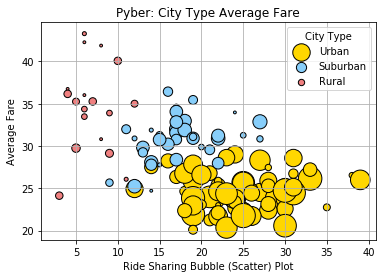

In [3]:
# Obtain the x and y coordinates for each of the three city types
UrbanDF = DF_Combined[DF_Combined["type"]=="Urban"]
SuburbanDF = DF_Combined[DF_Combined["type"]=="Suburban"]
RuralDF = DF_Combined[DF_Combined["type"]=="Rural"]

# Circle size correlates to driver count per city (each circle is one city)
# Get count of rides per ride id
UrbanRides = UrbanDF.groupby(["city"]).count()["ride_id"] #giving us the count of rides based on the ride id
SuburbanRides = SuburbanDF.groupby(["city"]).count()["ride_id"]
RuralRides = RuralDF.groupby(["city"]).count()["ride_id"]

# Get the average fare
RuralAvgFare = RuralDF.groupby(["city"]).mean()["fare"]
SuburbanAvgFare = SuburbanDF.groupby(["city"]).mean()["fare"]
UrbanAvgFare = UrbanDF.groupby(["city"]).mean()["fare"]

# Get Driver Count
RuralDriverCount = RuralDF.groupby(["city"]).mean()["driver_count"] #we still use mean function because we want to use the driver count number(38) not add them
SuburbanDriverCount = SuburbanDF.groupby(["city"]).mean()["driver_count"]
UrbanDriverCount = UrbanDF.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(UrbanRides,UrbanAvgFare , s = 8*UrbanDriverCount , c = "gold" , marker = "o" , label = "Urban" , edgecolors = "black" )
plt.scatter(SuburbanRides,SuburbanAvgFare , s = 8*SuburbanDriverCount , c = "lightskyblue" , marker = "o", label = "Suburban", edgecolors = "black")
plt.scatter(RuralRides,RuralAvgFare , s = 8*RuralDriverCount , c = "lightcoral" , marker = "o" , label = "Rural" , edgecolors = "black" )

# Label Axes and Title
plt.xlabel("Ride Sharing Bubble (Scatter) Plot")
plt.ylabel("Average Fare")
plt.title("Pyber: City Type Average Fare")

# Add grid
plt.grid(True)

# Create Legend
plt.legend(loc = "best" , title = "City Type")

# SAave and Show PLot
plt.savefig("Output/bpina_Output_BubblePlot")
plt.show()

## Total Fares by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64
Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')


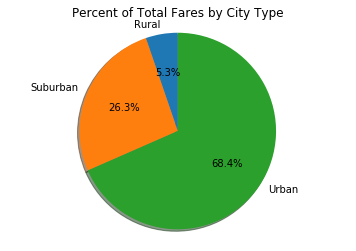

In [4]:
#############################
# TOTAL FARES PER CITY TYPE (62 urban, 30 sub) WRONG
#############################

CombinedTotalFaresPerType = DF_Combined.groupby("type").count()["fare"]
print(CombinedTotalFaresPerType)

# Generate List with Keys (Labels)
CityTypeKeys = CombinedTotalFaresPerType.keys()
print(CityTypeKeys)

# Create a Pie Chart
plt.pie(CombinedTotalFaresPerType , labels = CityTypeKeys , autopct = "%1.1f%%" , shadow = True , startangle = 90)

# Set Title
plt.title("Percent of Total Fares by City Type")

# Save and show plot
plt.savefig("Output/bp_output_PieChart_TotalFARESByCityType.png")
plt.axis("equal")
plt.show()

## Total Rides by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


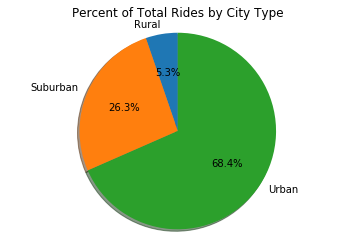

In [5]:
#############################
# TOTAL RIDES PER CITY TYPE (68 URban, 26 sub) RIGHT
#############################

CombinedTotalRidesPerType = DF_Combined.groupby("type").count()["ride_id"]
print(CombinedTotalRidesPerType)

# Create a Pie Chart
plt.pie(CombinedTotalRidesPerType , labels = CityTypeKeys , autopct = "%1.1f%%" , shadow = True , startangle = 90)

# Set Title
plt.title("Percent of Total Rides by City Type")

# Save and show plot
plt.savefig("Output/bp_output_PieChart_TotalRIDESByCityType.png")
plt.axis("equal")
plt.show()

## Total Drivers by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64


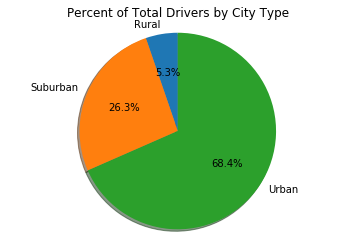

In [6]:
#############################
# TOTAL DRIVERS PER CITY TYPE (80 urban, 16 sub, 2.6 rural) WRONG
#############################

CombinedTotalDriversPerType = DF_Combined.groupby("type").count()["driver_count"]
print(CombinedTotalDriversPerType)

# Create a Pie Chart
plt.pie(CombinedTotalDriversPerType , labels = CityTypeKeys , autopct = "%1.1f%%" , shadow = True , startangle = 90)

# Set Title
plt.title("Percent of Total Drivers by City Type")

# Save and show plot
plt.savefig("Output/bp_output_PieChart_TotalDRIVERSByCityType.png")
plt.axis("equal")
plt.show()